In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
from pathlib import Path
import random
import librosa
import numpy as np
from IPython.display import Audio

import matplotlib.pyplot as plt

from cnn_audio.preprocessing import plot_recording, extract_features, process_single_file
from cnn_audio.params import pr

In [3]:
seconds = pr['nsynth']['max_seconds']
hop_length = pr['librosa']['hop_length']
window_size = pr['librosa']['spec_windows']
calc_features = ['chroma', 'mfcc']

In [28]:
glob_pattern = '*' #'bass_*_*-[0-9][4-7][0-9]-*.wav'

In [29]:
audio_files_dir = Path('./data/nsynth-train/audio')
audio_files = list(audio_files_dir.glob(glob_pattern))

In [30]:
set([i.stem[:i.stem.find('_')] for i in audio_files])

{'bass',
 'brass',
 'flute',
 'guitar',
 'keyboard',
 'mallet',
 'organ',
 'reed',
 'string',
 'synth',
 'vocal'}

In [58]:
# random.seed(42)
audio_file = random.choice(audio_files)
audio_file.stem

'keyboard_electronic_023-033-127'

In [59]:
audio_data, sr = librosa.load(audio_file, sr=None)

In [60]:
audio_data.shape

(64000,)

In [69]:
Audio(audio_data, rate=sr)

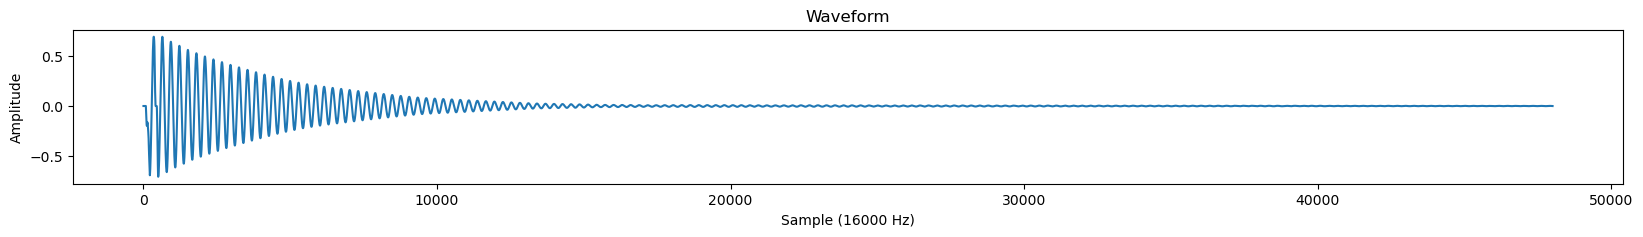

In [61]:
plot_recording(audio_data, sample_rate=sr, seconds=seconds)

In [62]:
audio_file_name, features = process_single_file(audio_file, seconds, window_size, hop_length, calc_features)
audio_file_name

'keyboard_electronic_023-033-127'

In [63]:
features['stft'].shape

(1025, 94)

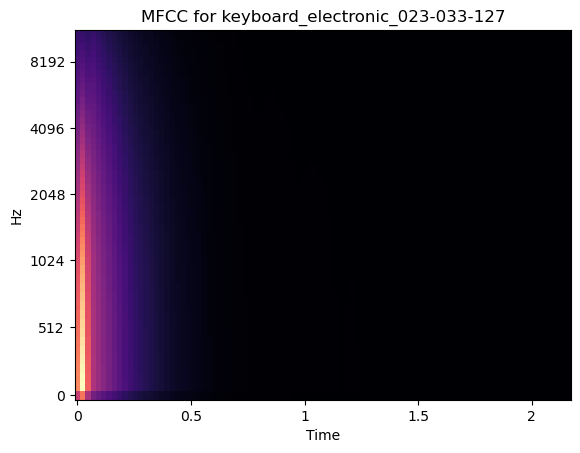

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

img2 = librosa.display.specshow(features['mfcc'], x_axis='time', y_axis='mel', ax=ax)
ax.set(title=f'MFCC for {audio_file_name}');


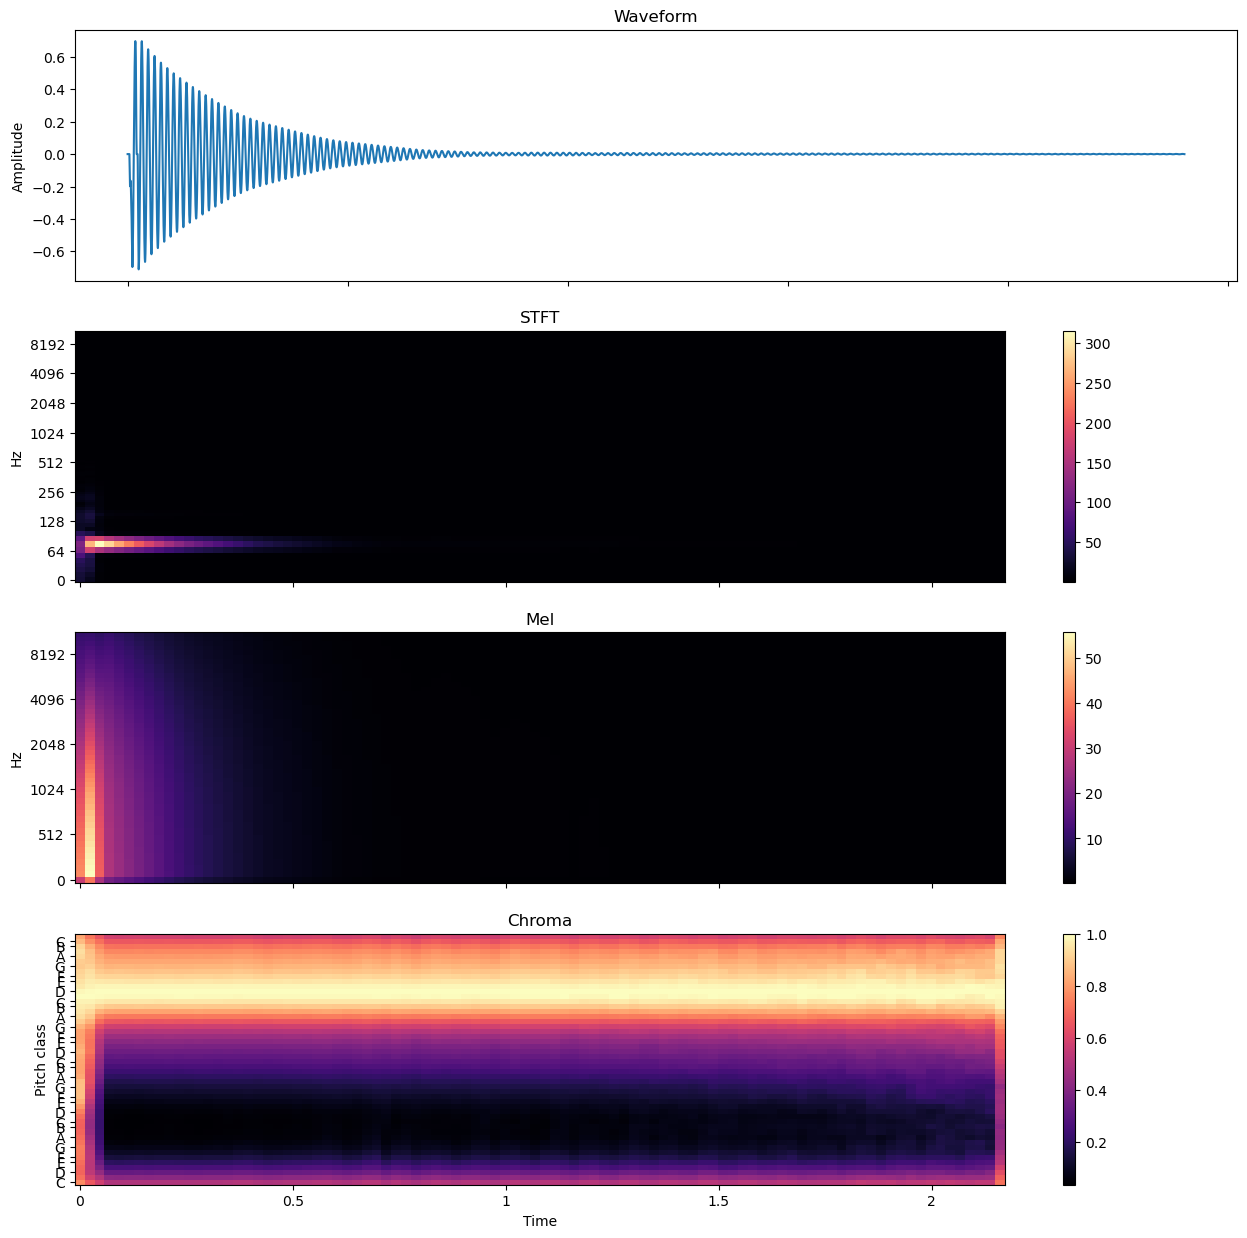

In [65]:

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(15, 15))

img0 = ax[0].plot(audio_data[0 : seconds * sr])
ax[0].set_title('Waveform')
ax[0].set_xlabel(f'Sample ({sr} Hz)')
ax[0].set_ylabel('Amplitude')

img1 = librosa.display.specshow(features['stft'], x_axis='time', y_axis='log', ax=ax[1])
ax[1].set(title='STFT')

img2 = librosa.display.specshow(features['mfcc'], x_axis='time', y_axis='mel', ax=ax[2])
ax[2].set(title='Mel')

img3 = librosa.display.specshow(features['chroma'], x_axis='time', y_axis='chroma', ax=ax[3])
ax[3].set(title='Chroma')

for ax_i in ax:
    ax_i.label_outer()

fig.colorbar(img1, ax=[ax[1]])
fig.colorbar(img2, ax=[ax[2]])
fig.colorbar(img3, ax=[ax[3]])

plt.show();
